In [1]:
import networkx as nx
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allowing the plot in line for seaborn
%matplotlib inline
plt.style.use('seaborn')

# enabling outlines line in histogram
plt.rcParams["patch.force_edgecolor"] = True

from networkx.algorithms.community.quality import coverage, modularity

### Load graph and read basic information

In [2]:
vax_g = nx.read_gml('D:/AAA_NUS/CS5344/data/graph/Final_Graph_sentiment_Vax.gml')
vax_dig = nx.read_gml('D:/AAA_NUS/CS5344/data/graph/Final_DiGraph_sentiment_Vax.gml')

In [3]:
print(nx.info(vax_g))
print('-------------------------------------------')
print(nx.info(vax_dig))

Name: Final vax Graph
Type: Graph
Number of nodes: 39583
Number of edges: 105857
Average degree:   5.3486
-------------------------------------------
Name: Final vax Direct Graph
Type: DiGraph
Number of nodes: 39583
Number of edges: 110630
Average in degree:   2.7949
Average out degree:   2.7949


In [4]:
from analysis.analysis_utils import create_graph_df

vax_df = create_graph_df(vax_g)

  0%|          | 0/39583 [00:00<?, ?it/s]

### Centrality

In [5]:
from analysis.analysis_utils import extract_community

comm_0 = extract_community(vax_dig, 0, 'sentimentComm')
comm_1 = extract_community(vax_dig, 1, 'sentimentComm')

In [6]:
from analysis_utils import compute_degree, compute_betweenness

compute_degree(comm_0, 1)
compute_degree(comm_1, 1)

Name: 
Type: MultiDiGraph
Number of nodes: 19583
Number of edges: 57794
Average in degree:   2.9512
Average out degree:   2.9512
Name: 
Type: MultiDiGraph
Number of nodes: 19583
Number of edges: 57794
Average in degree:   2.9512
Average out degree:   2.9512
degree: [('l_w_i', 0.02277601879276887), ('derbyshirebevs', 0.017516086201613726), ('finnpal', 0.0147073843325503), ('timbirchwild', 0.013277499744663466), ('teddybird', 0.012256153610458584), ('ecg_mk', 0.011898682463486875), ('janelambertecg', 0.011439076703094679), ('postpolionews', 0.011234807476253703), ('delilahveronese', 0.01021346134204882), ('theguruoutlaw', 0.010162394035338576)]
Name: 
Type: MultiDiGraph
Number of nodes: 20000
Number of edges: 193797
Average in degree:   9.6898
Average out degree:   9.6898
Name: 
Type: MultiDiGraph
Number of nodes: 20000
Number of edges: 193797
Average in degree:   9.6898
Average out degree:   9.6898
degree: [('sheldon_walker_', 0.6507325366268313), ('krebiozen', 0.3639681984099205), ('mo

In [13]:
compute_betweenness(comm_0)
compute_betweenness(comm_1)

Name: 
Type: MultiDiGraph
Number of nodes: 19583
Number of edges: 57794
Average in degree:   2.9512
Average out degree:   2.9512
Name: 
Type: MultiDiGraph
Number of nodes: 19583
Number of edges: 57794
Average in degree:   2.9512
Average out degree:   2.9512
between: [('who', 0.0026210840173327065), ('who_europe', 0.0024860205370549004), ('v_andriukaitis', 0.002292890606569146), ('itraineu', 0.0016510157322094275), ('ecdc_vpd', 0.0015433347820970496), ('julieleask', 0.001314572360551986), ('epi_michael', 0.0011552630140623768), ('corneliabetsch', 0.0011109829180700253), ('whosearo', 0.0007165187512828727), ('gavi', 0.0006413130874427582)]
Name: 
Type: MultiDiGraph
Number of nodes: 20000
Number of edges: 193797
Average in degree:   9.6898
Average out degree:   9.6898
Name: 
Type: MultiDiGraph
Number of nodes: 20000
Number of edges: 193797
Average in degree:   9.6898
Average out degree:   9.6898
between: [('thereal_truther', 0.004123821334861975), ('chrisvcsefalvay', 0.002008406771948867)

### Member in Community

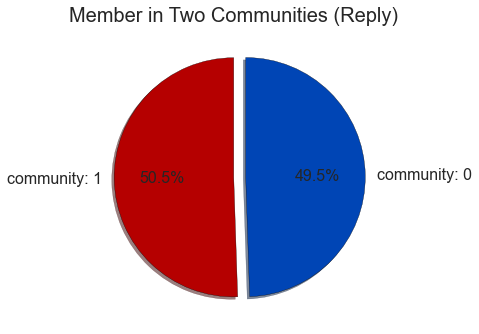

In [8]:
from analysis.analysis_utils import community_pie_chart

community_pie_chart(vax_g, 'sentimentComm', 'Member in Two Communities (Reply)')

D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

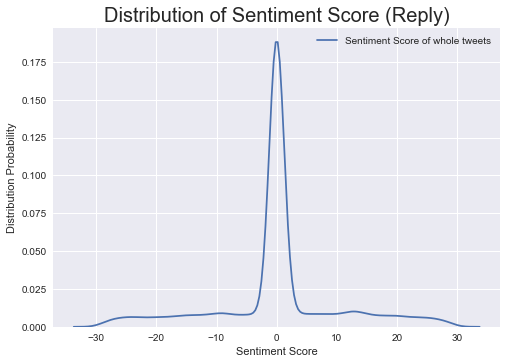

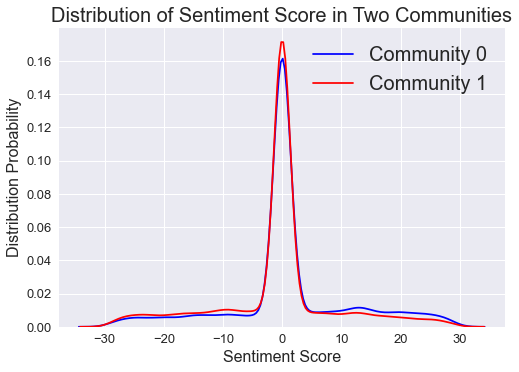

In [9]:
from analysis.analysis_utils import plot_sentiment_distribution1
from analysis.analysis_utils import plot_sentiment_distribution2

plot_sentiment_distribution1(vax_g, 'Distribution of Sentiment Score (Reply)', vax_df)
plot_sentiment_distribution2(vax_g, 'Distribution of Sentiment Score (Reply)', vax_df)

### Degree

  0%|          | 0/39583 [00:00<?, ?it/s]

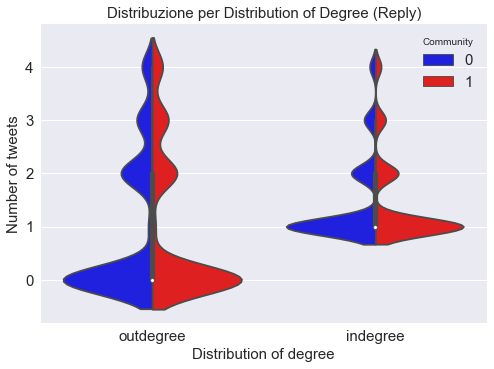

In [10]:
from analysis.analysis_utils import plot_degree_distribution

plot_degree_distribution(vax_dig, 'Distribution of Degree (Reply)', 0)

In [11]:
print(vax_df.columns[2:len(vax_df.columns)])

Index(['sentimentComm'], dtype='object')


In [12]:
vax_df.to_csv('vax_df_reply.csv')